In [1]:
import os, sys
import numpy as np
import pandas as pd
import librosa
import IPython.display as ipd
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import fma_utilities as utils
from sklearn.utils import shuffle
import tensorflow
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader, Dataset

2023-12-22 21:22:46.745061: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Directory where mp3 are stored.
AUDIO_DIR = '../../dataset_process/data/fma_small/'

# Load metadata and features.
tracks = utils.load('../../dataset_process/data/fma_metadata/tracks.csv')
# genres = utils.load('../../dataset_process/data/fma_metadata/genres.csv')
# features = utils.load('../../dataset_process/data/fma_metadata/features.csv')
# echonest = utils.load('../../dataset_process/data/fma_metadata/echonest.csv')

# np.testing.assert_array_equal(features.index, tracks.index)
# assert echonest.index.isin(tracks.index).all()

# tracks.shape, genres.shape, features.shape, echonest.shape

In [3]:
def get_trackID_from_path(path):
    return int(path.split('/')[-1].split('.')[0])

def get_track_top_genre(trackID):
    return tracks.loc[trackID]['track']['genre_top']

In [4]:
# Get the base directory
basedir = os.getcwd()
dirname = basedir+ "/../../dataset_process/data/fma_small/"
print(dirname)
# Save audio paths and labels
audio_paths = []
# audio_dict = {}
audio_label = []
# Print all the files in different directories
for root, dirs, files in os.walk(dirname, topdown=False):
    for filenames in files:
        if filenames.find('.mp3') != -1:
            
            path = os.path.join(root, filenames)
            genre = get_track_top_genre(get_trackID_from_path(path))
            # print(filenames, genre)
            audio_paths.append(path)
            filenames = filenames.split('.', 1)
            filenames = filenames[0]
            
            audio_label.append(genre)
audio_paths = np.array(audio_paths)
audio_label = np.array(audio_label)
audio_paths, audio_label = shuffle(audio_paths, audio_label, random_state=7)
audio_paths.shape, audio_label.shape
# print(audio_paths[0], audio_label[0])

/root/autodl-tmp/MusicGenreClassification/neural_network/cnn/../../dataset_process/data/fma_small/


((8000,), (8000,))

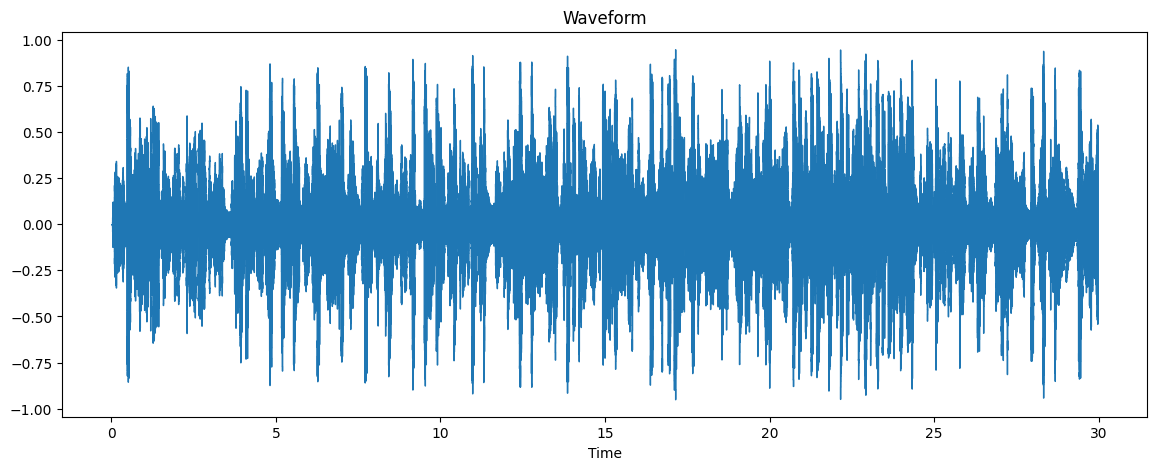

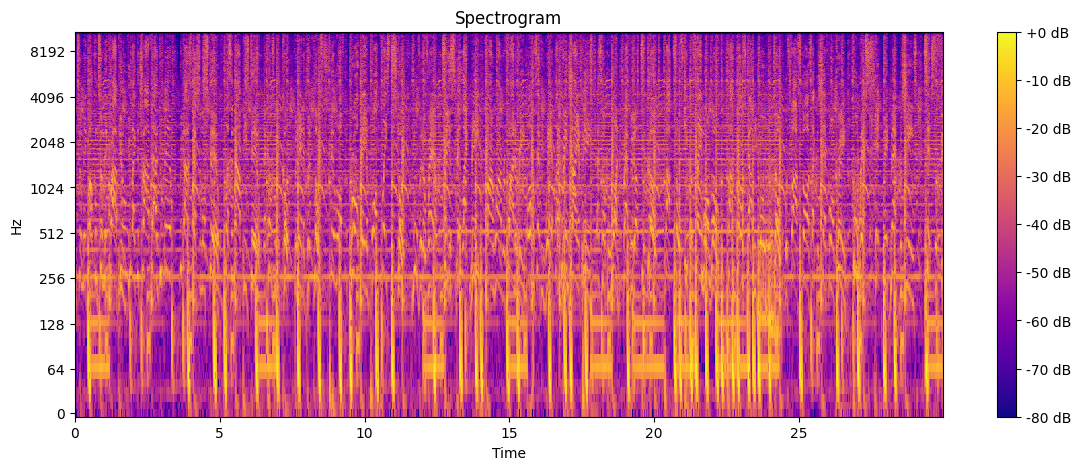

(1025, 1291)


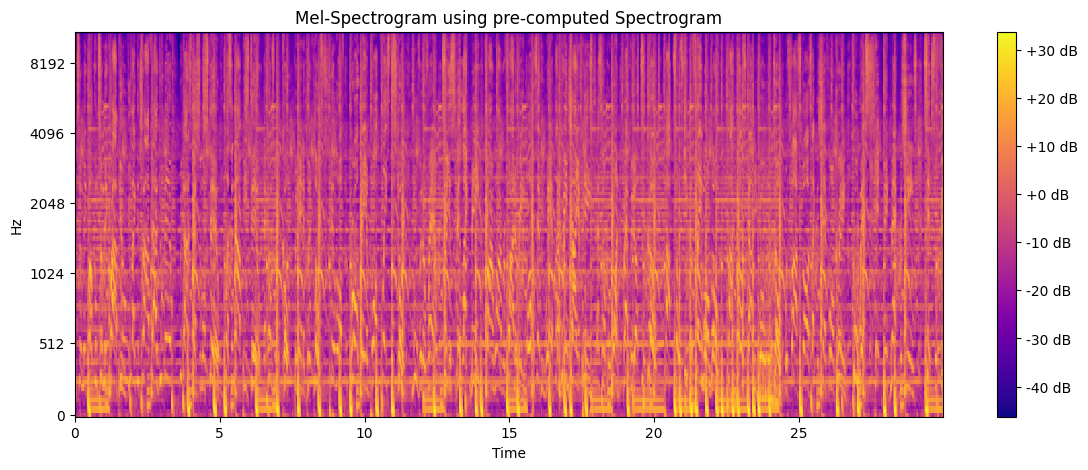

(128, 1291)


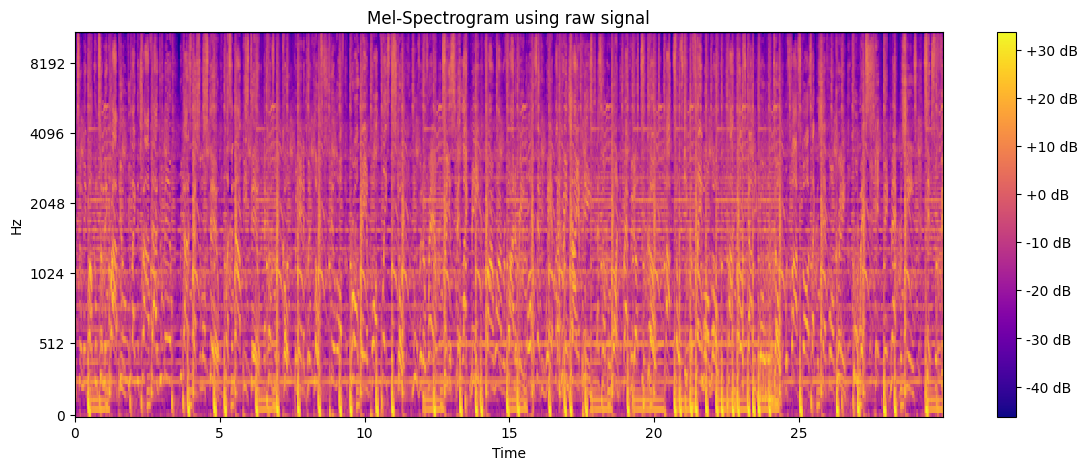

(128, 1291)


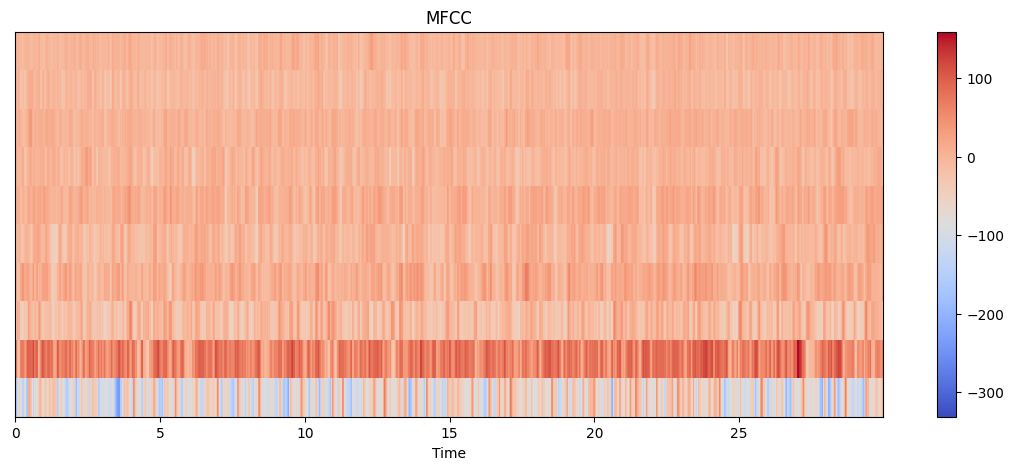

(10, 1291)
(660984,)
108807


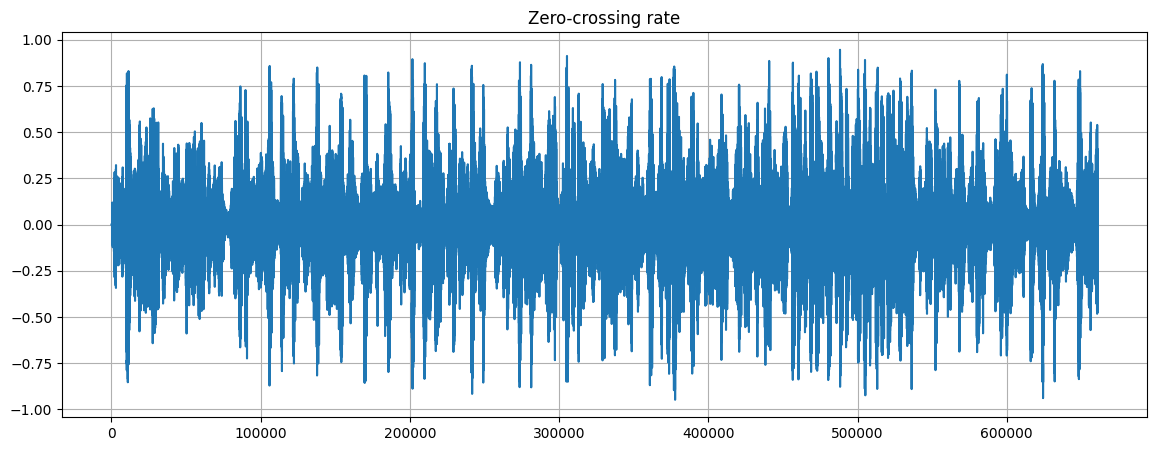

(1, 1291)


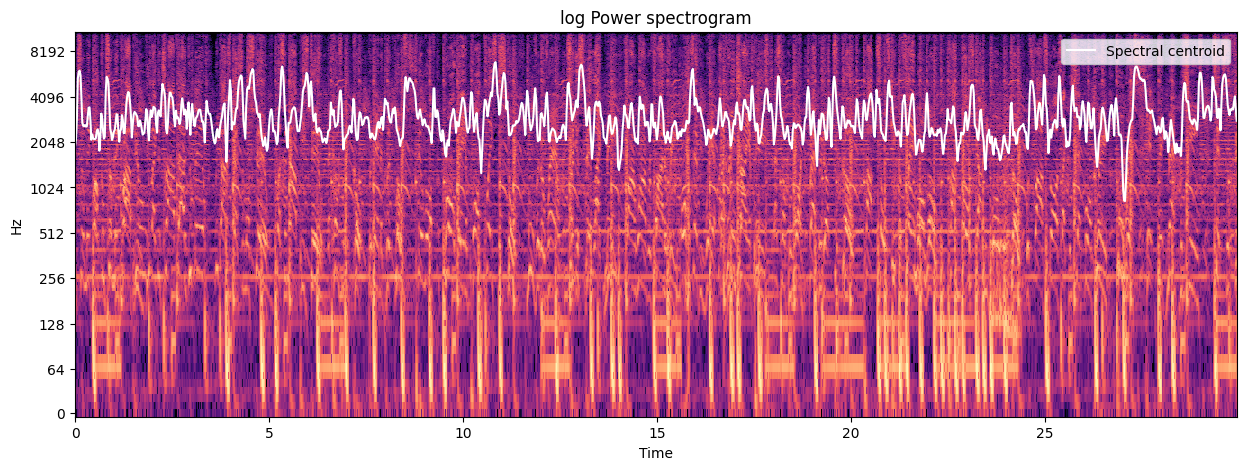

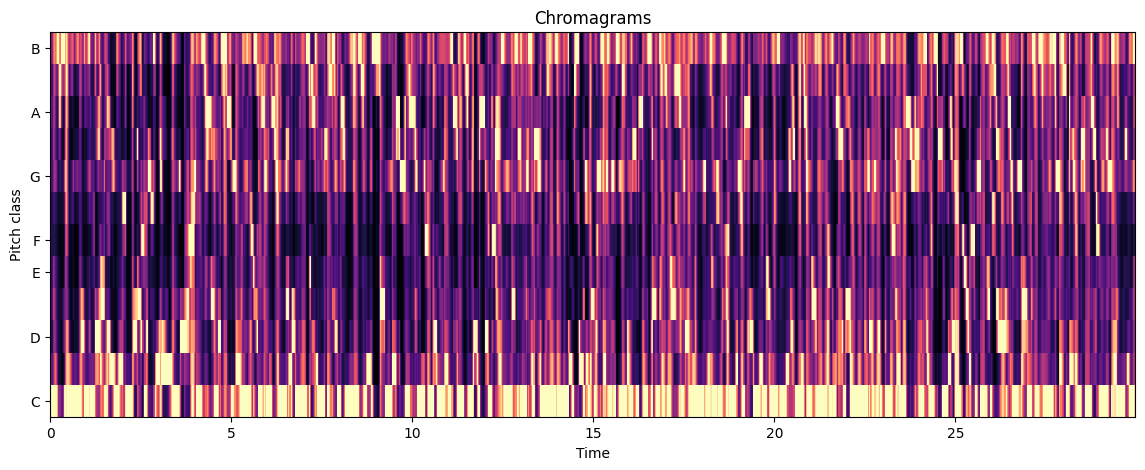

(12, 1291)


In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Replace 'audio_1' with your audio file path
audio_1 = '../../dataset_process/data/fma_small/000/000002.mp3'
y, sr = librosa.load(audio_1)

# Display waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

# Display Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
print(D.shape)

# Display Mel-Spectrogram using pre-computed Spectrogram
S = np.abs(librosa.stft(y))**2
mel = librosa.feature.melspectrogram(S=S, sr=sr)
mel_db = librosa.power_to_db(mel)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram using pre-computed Spectrogram')
plt.show()
print(mel_db.shape)

# Display Mel-Spectrogram using raw signal
mel_raw = librosa.feature.melspectrogram(y=y, sr=sr)
mel_db_raw = librosa.power_to_db(mel_raw)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_db_raw, sr=sr, x_axis='time', y_axis='mel', cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram using raw signal')
plt.show()
print(mel_db_raw.shape)

# Display MFCC (Mel-frequency cepstral coefficients)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()
print(mfcc.shape)

# Display Zero-crossing rate
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.grid()
zc = librosa.zero_crossings(y, pad=False)
print(zc.shape)
print(sum(zc))
plt.title('Zero-crossing rate')
plt.show()

# Display Spectral centroid using raw signal
# Spectral centroid using raw signal
sp_cen = librosa.feature.spectral_centroid(y=y, sr=sr)
# print(sp_cen.shape)
X = librosa.stft(y)
times = librosa.times_like(sp_cen)
fig, ax = plt.subplots(1, figsize= (15, 5))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(X), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, sp_cen.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')
print(sp_cen.shape)


# Display Chromagrams
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.title('Chromagrams')
plt.show()
print(chroma_stft.shape)


In [5]:
import tqdm

count = 0
bad_index = []
fraction = 1
segment = 512
length = len(audio_paths) // fraction
print(length)
# Create empty arrays to save the features
AllSpec = np.empty([length, 1025, segment], dtype=np.float32)
AllMel = np.empty([length, 128, segment], dtype=np.float32)
AllMfcc = np.empty([length, 10, segment], dtype=np.float32)
AllZcr = np.empty([length, segment], dtype=np.float32)
AllCen = np.empty([length, segment], dtype=np.float32)
AllChroma = np.empty([length, 12, segment], dtype=np.float32)
audio_label = audio_label[:length]


# enable multithreading
# import multiprocessing
# from joblib import Parallel, delayed
# from joblib import parallel_backend
# num_cores = multiprocessing.cpu_count()
# print(num_cores)

# # Parallelize the audio feature extraction process

# def processInput(i):
#     try:
#         # print(i)
#         path = audio_paths[i]
#         y, sr = librosa.load(path)
#         # For Spectrogram
#         X = librosa.stft(y)
#         Xdb = librosa.amplitude_to_db(abs(X[:,:1291]))
#         AllSpec[i] = Xdb
        
#         # Mel-Spectrogram 
#         M = librosa.feature.melspectrogram(y=y)
#         M_db = librosa.power_to_db(M[:,:1291])
#         AllMel[i] = M_db
        
#         # MFCC
#         mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 10)[:,:1291]
#         AllMfcc[i] = mfcc
        
#         # Zero-crossing rate
#         zcr = librosa.feature.zero_crossing_rate(y)[0][:1291]
#         AllZcr[i] = zcr
        
#         # Spectral centroid
#         sp_cen = librosa.feature.spectral_centroid(y=y, sr=sr)[0][:1291]
#         AllCen[i] = sp_cen
        
#         # Chromagram
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)[:,:1291]
#         AllChroma[i] = chroma_stft

        

#     except Exception as e:
#         bad_index.append(i)

# with parallel_backend('threading', n_jobs=num_cores):Parallel()(delayed(processInput)(i) for i in tqdm.tqdm(range(length)))


for i in tqdm.tqdm(range(length)):
    try:
        path = audio_paths[i]
        y, sr = librosa.load(path)
        # For Spectrogram
        X = librosa.stft(y)[:,:segment]
        Xdb = librosa.amplitude_to_db(abs(X))
        AllSpec[i] = Xdb
        
        # Mel-Spectrogram 
        M = librosa.feature.melspectrogram(y=y)[:,:segment]
        M_db = librosa.power_to_db(M)
        AllMel[i] = M_db
        
        # MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 10)[:,:segment]
        AllMfcc[i] = mfcc
        
        # Zero-crossing rate
        zcr = librosa.feature.zero_crossing_rate(y)[0][:segment]
        AllZcr[i] = zcr
        
        # Spectral centroid
        sp_cen = librosa.feature.spectral_centroid(y=y, sr=sr)[0][:segment]
        AllCen[i] = sp_cen
        
        # Chromagram
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)[:,:segment]
        AllChroma[i] = chroma_stft

        

    except Exception as e:
        print(e)
        print(audio_paths[i])
        print(i)
        bad_index.append(i)


# Convert to float32
AllSpec = AllSpec.astype(np.float32)
print(f'AllSpec shape: {AllSpec.shape}')
AllMel = AllMel.astype(np.float32)
print(f'AllMel shape: {AllMel.shape}')
AllMfcc = AllMfcc.astype(np.float32)
print(f'AllMfcc shape: {AllMfcc.shape}')
AllZcr = AllZcr.astype(np.float32)
print(f'AllZcr shape: {AllZcr.shape}')
AllCen = AllCen.astype(np.float32)
print(f'AllCen shape: {AllCen.shape}')
AllChroma = AllChroma.astype(np.float32)
print(f'AllChroma shape: {AllChroma.shape}')

8000


  1%|▏         | 106/8000 [00:34<37:46,  3.48it/s]/root/miniconda3/lib/python3.8/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 8000/8000 [39:25<00:00,  3.38it/s]


AllSpec shape: (8000, 1025, 512)
AllMel shape: (8000, 128, 512)
AllMfcc shape: (8000, 10, 512)
AllZcr shape: (8000, 512)
AllCen shape: (8000, 512)
AllChroma shape: (8000, 12, 512)


In [6]:
print(bad_index)

[]


In [7]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

In [8]:
# Convert labels from string to numerical
label_map = {
    'Experimental': 0,
    'Rock': 1,
    'Instrumental': 2,
    'International': 3,
    'Hip-Hop': 4,
    'Folk': 5,
    'Electronic': 6,
    'Pop': 7
}

# for name in audio_label:
#     print(name)

# Convert labels using the map
audio_label_num = [label_map[label] for label in audio_label[: length]]
audio_label_num = np.array(audio_label_num)

print(audio_label_num.shape)
# audio_label_tensor = torch.tensor(audio_label)

num_classes = 8
# y = to_categorical(audio_label_tensor, num_classes=num_classes)
y = tensorflow.keras.utils.to_categorical(audio_label_num,num_classes = 8, dtype ="int32")
print(y.shape)

np.savez_compressed(os.getcwd()+"/MusicFeatures.npz", spec= AllSpec, mel= AllMel, mfcc= AllMfcc, zcr= AllZcr, cen= AllCen, chroma= AllChroma, target=y)

(8000,)
(8000, 8)
